In [50]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import DistanceMetric
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [51]:
dataset = pd.read_csv('../data/heart_disease_dataset_UCI.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScalar = StandardScaler()
target_columns = ['age','trestbps','chol','thalach','oldpeak']
dataset[target_columns] = standardScalar.fit_transform(dataset[target_columns])
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [53]:
#Dividing into input and output
X= dataset.drop(['target'], axis=1)
Y= dataset['target']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state=40)

In [54]:
n_neighbors = 1
nca = NeighborhoodComponentsAnalysis(n_components=2)
functions = ['manhattan','euclidean','chebyshev']

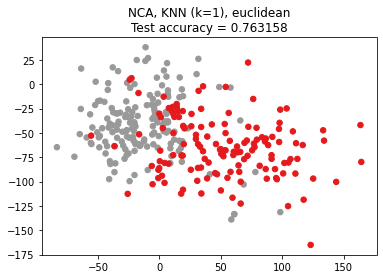

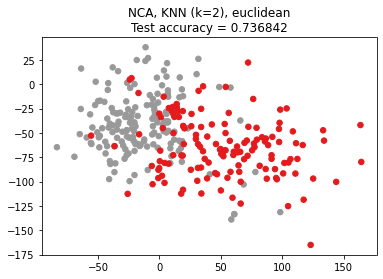

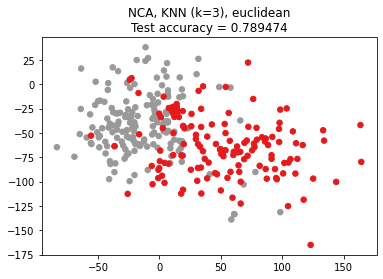

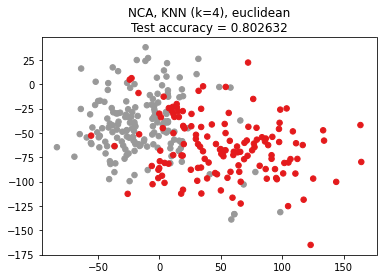

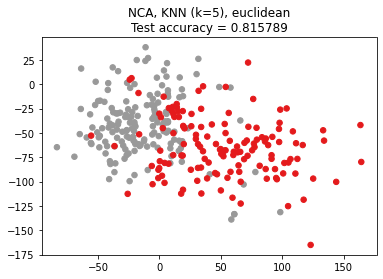

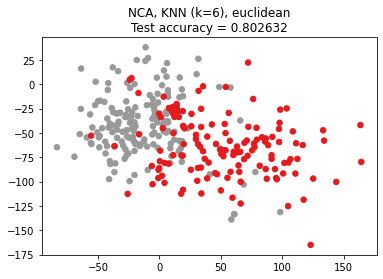

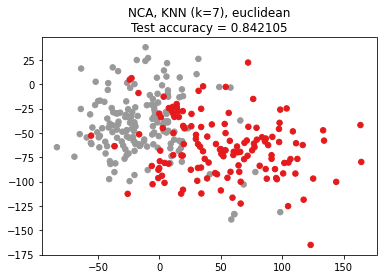

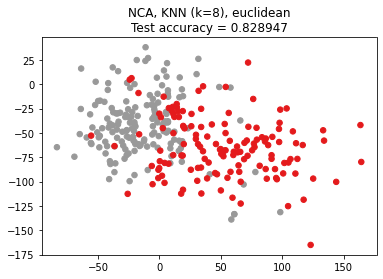

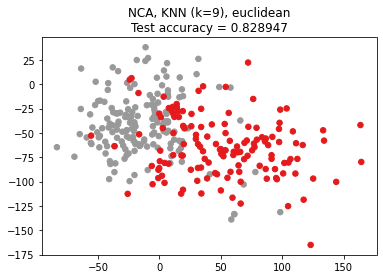

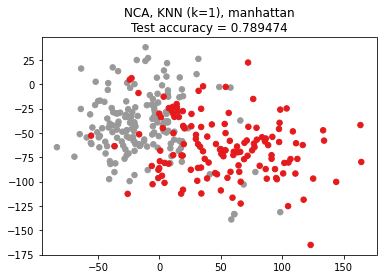

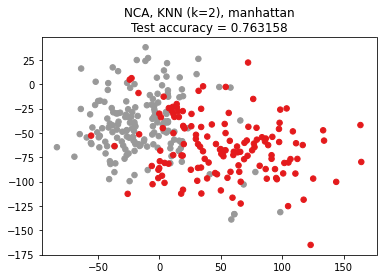

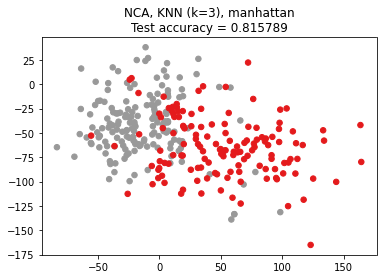

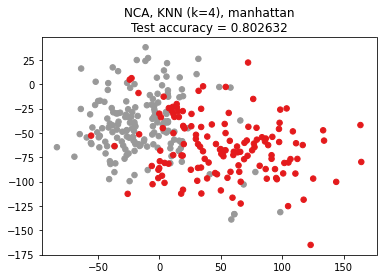

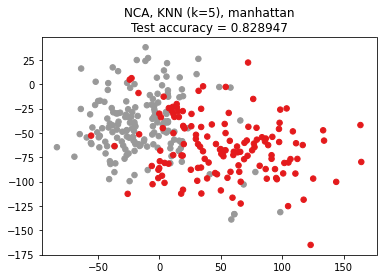

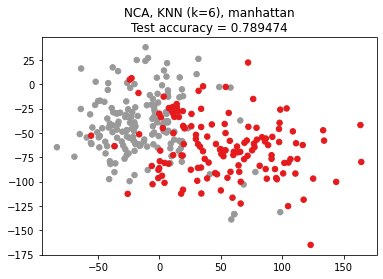

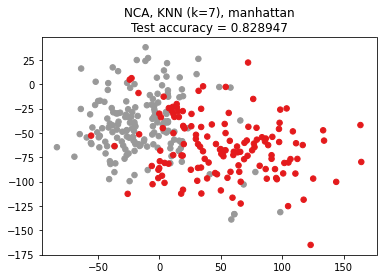

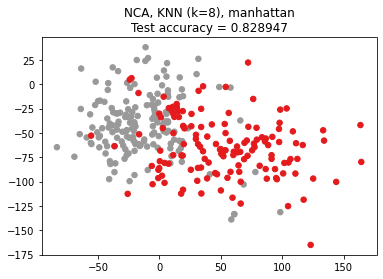

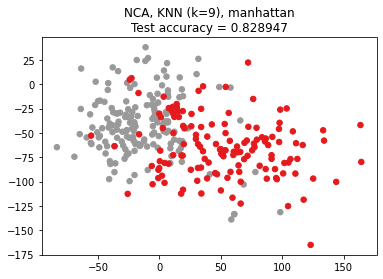

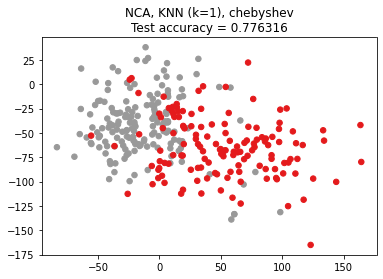

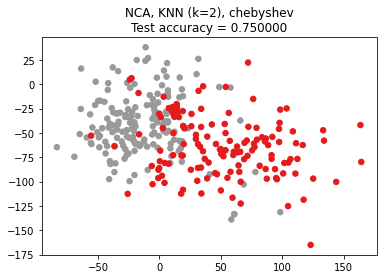

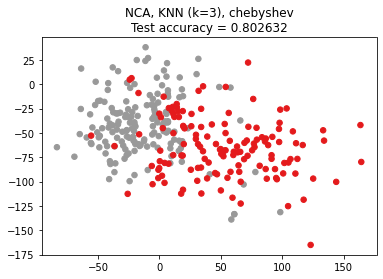

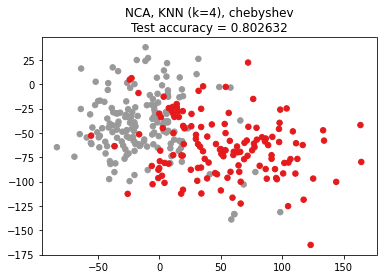

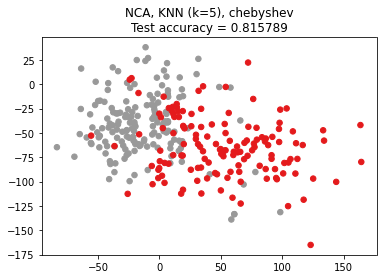

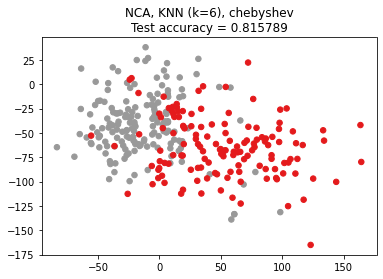

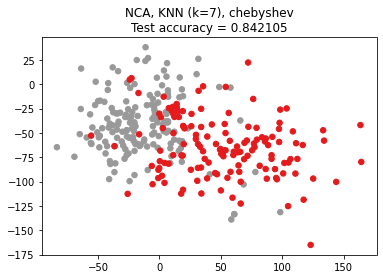

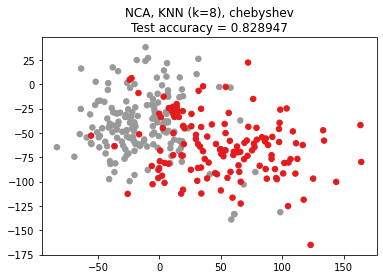

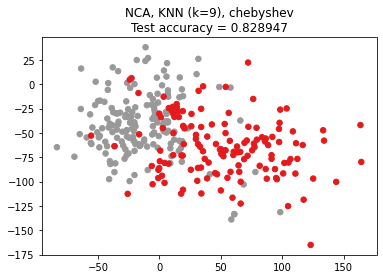

In [55]:
    for distfunc in functions:
        for i in range(0,9):
            knn = KNeighborsClassifier(n_neighbors=n_neighbors + i, metric=distfunc)
            plt.figure()
            nca.fit(X_train,Y_train)
            knn.fit(nca.transform(X_train), Y_train)
            acc_knn = knn.score(nca.transform(X_test), Y_test)
            X_embedded = nca.transform(X)
            plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=Y, s=30, cmap="Set1")
            plt.title(
                    "{}, KNN (k={}), {}\nTest accuracy = {:.6f}".format("NCA", n_neighbors + i, distfunc, acc_knn)
            )
            plt.show

In [56]:
for distfunc in functions:
    for i in range(0,9):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors + i, metric=distfunc)
        knnmodel = knn.fit(X_train, Y_train)
        knnpredict = knnmodel.predict(X_test)
        cmknn = confusion_matrix(Y_test, knnpredict)
        print(distfunc, "| K Neighbors =", str(i+1),'\n', cmknn)
        print("Accuracy=", accuracy_score(Y_test, knnpredict),"\n")

euclidean | K Neighbors = 1 
 [[26  8]
 [ 8 34]]
Accuracy= 0.7894736842105263 

euclidean | K Neighbors = 2 
 [[31  3]
 [13 29]]
Accuracy= 0.7894736842105263 

euclidean | K Neighbors = 3 
 [[29  5]
 [ 5 37]]
Accuracy= 0.868421052631579 

euclidean | K Neighbors = 4 
 [[30  4]
 [ 8 34]]
Accuracy= 0.8421052631578947 

euclidean | K Neighbors = 5 
 [[27  7]
 [ 3 39]]
Accuracy= 0.868421052631579 

euclidean | K Neighbors = 6 
 [[29  5]
 [ 6 36]]
Accuracy= 0.8552631578947368 

euclidean | K Neighbors = 7 
 [[27  7]
 [ 3 39]]
Accuracy= 0.868421052631579 

euclidean | K Neighbors = 8 
 [[27  7]
 [ 6 36]]
Accuracy= 0.8289473684210527 

euclidean | K Neighbors = 9 
 [[27  7]
 [ 6 36]]
Accuracy= 0.8289473684210527 

manhattan | K Neighbors = 1 
 [[27  7]
 [ 7 35]]
Accuracy= 0.8157894736842105 

manhattan | K Neighbors = 2 
 [[30  4]
 [11 31]]
Accuracy= 0.8026315789473685 

manhattan | K Neighbors = 3 
 [[29  5]
 [ 4 38]]
Accuracy= 0.881578947368421 

manhattan | K Neighbors = 4 
 [[29  5]
 [ 5 